<a href="https://colab.research.google.com/github/ishaanpaul98/Trading/blob/main/Trading/Bollinger_Band.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ticker = input("Enter ticker for desired company: ")
df = yf.download(ticker, start = '2019-01-01')

Enter ticker for desired company: FB
[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800
...,...,...,...,...,...,...
2022-04-01,224.550003,227.279999,222.699997,224.850006,224.850006,19533300
2022-04-04,225.979996,234.350006,225.860001,233.889999,233.889999,28054800
2022-04-05,234.080002,236.860001,231.020004,231.839996,231.839996,29727200


In [5]:
window = input("Enter window for rolling average and standard deviation: ")
window = int(window)

Enter window for rolling average and standard deviation: 20


In [6]:
#Simple Moving Average
df['SMA'] = df.Close.rolling(window=window).mean()

In [7]:
#Standard Deviation
df['stddev'] = df.Close.rolling(window=window).std()

In [8]:
#Upper band
df['Upper'] = df.SMA + 2*df.stddev

In [9]:
#Lower band
df['Lower'] = df.SMA - 2*df.stddev

In [10]:
#Buying signals
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)

In [11]:
#Selling signals
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

In [12]:
df = df.dropna()

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2019-01-30,146.220001,150.949997,145.699997,150.419998,150.419998,44613200,144.359499,5.024985,154.409469,134.309530,False,False
2019-01-31,165.600006,171.679993,165.000000,166.690002,166.690002,77233600,145.910000,6.708186,159.326372,132.493628,False,True
2019-02-01,165.839996,169.100006,165.660004,165.710007,165.710007,30806500,147.608500,7.213105,162.034711,133.182289,False,True
2019-02-04,165.699997,169.300003,163.619995,169.250000,169.250000,20036000,149.173500,8.318123,165.809746,132.537254,False,True
2019-02-05,169.149994,171.979996,168.690002,171.160004,171.160004,22557000,150.829000,9.232360,169.293719,132.364281,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,224.550003,227.279999,222.699997,224.850006,224.850006,19533300,208.860002,14.937720,238.735442,178.984563,False,False
2022-04-04,225.979996,234.350006,225.860001,233.889999,233.889999,28054800,211.181002,15.045198,241.271398,181.090606,False,False
2022-04-05,234.080002,236.860001,231.020004,231.839996,231.839996,29727200,213.258502,14.876406,243.011313,183.505691,False,False


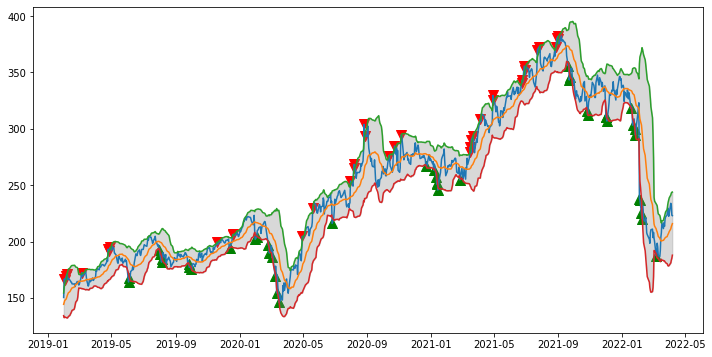

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker = '^', color='green', s = 100)
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker = 'v', color='red', s = 100)
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.show()

In [15]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
  if df.Lower[i] > df.Close[i]:
    if open_pos == False:
      buys.append(i)
      open_pos = True

  elif df.Upper[i] < df.Close[i]:
    if open_pos:
      sells.append(i)
      open_pos = False


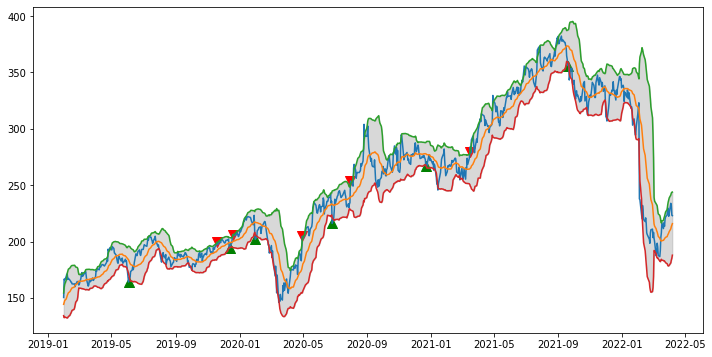

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker = '^', color='green', s = 100)
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker = 'v', color='red', s = 100)
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.show()

In [17]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)

In [18]:
merged.columns = ['Buys', 'Sells']
merged

,Buys,Sells
Date,,
2019-06-03,164.149994,NaN
2019-11-19,NaN,199.320007
2019-12-13,194.110001,NaN
2019-12-19,NaN,206.059998
2020-01-31,201.910004,NaN
2020-04-30,NaN,204.710007
2020-06-26,216.080002,NaN
2020-07-31,NaN,253.669998
2020-12-22,267.089996,NaN


In [19]:
totalprofit = merged.shift(-1).Sells - merged.Buys
totalprofit

Date
2019-06-03    35.170013
2019-11-19          NaN
2019-12-13    11.949997
2019-12-19          NaN
2020-01-31     2.800003
2020-04-30          NaN
2020-06-26    37.589996
2020-07-31          NaN
2020-12-22    12.190002
2021-03-16          NaN
2021-09-20          NaN
dtype: float64

In [20]:
relprofits = (merged.shift(-1).Sells - merged.Buys)/merged.Buys
relprofits

Date
2019-06-03    0.214255
2019-11-19         NaN
2019-12-13    0.061563
2019-12-19         NaN
2020-01-31    0.013868
2020-04-30         NaN
2020-06-26    0.173963
2020-07-31         NaN
2020-12-22    0.045640
2021-03-16         NaN
2021-09-20         NaN
dtype: float64

In [21]:
relprofits.mean()

0.10185786475261346